### Dataframes in this notebook

* cohort13, cohort14, cohort15, cohort16, cohort17 <-- PICKLES created
* cohort_stats <-- PICKLE created
* year1, year2, year3, year4, year5 <--PICKLES created
* donations2013, donations2014, donations2015, donations2016, donations2017



In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [2]:
donations_13to17=pd.read_pickle('donations1_13to17.pkl')

In [3]:
for col in donations_13to17.columns:
    print(col)

id
first_gift_year
lapsed_count
recovered_count
max_consec_giving_years
total_giving_years
count_2013
count_2014
count_2015
count_2016
count_2017
count_yr0_x
count_yr1_x
count_yr2_x
count_yr3_x
count_yr4_x
lapsed_amount
recovered_amount
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_yr0
amount_yr1
amount_yr2
amount_yr3
amount_yr4
count_yr0_y
count_yr1_y
count_yr2_y
count_yr3_y
count_yr4_y
lapsed_amount_yr0
lapsed_amount_yr1
lapsed_amount_yr2
lapsed_amount_yr3
lapsed_amount_yr4
upgraded_amount_yr0
upgraded_amount_yr1
upgraded_amount_yr2
upgraded_amount_yr3
upgraded_amount_yr4
downgraded_amount_yr0
downgraded_amount_yr1
downgraded_amount_yr2
downgraded_amount

In [9]:
#suppress scientific notation
#DataFrame.describe(self, percentiles=None, include=None, exclude=None) default percentiles are .25, .5, .75
donations_13to17['amount_total'].describe().apply(lambda x: format(x, '.0f'))

count    1876468
mean         137
std         2304
min            0
25%           25
50%           50
75%          100
max      1836958
Name: amount_total, dtype: object

In [11]:
cohort_stats = donations_13to17.groupby('first_gift_year')['amount_total'].describe().reset_index()

In [29]:
cohort_stats['first_gift_year']=pd.to_datetime(cohort_stats['first_gift_year'])

In [30]:
cohort_stats.dtypes

first_gift_year    datetime64[ns]
count                     float64
mean                      float64
std                       float64
min                       float64
25%                       float64
50%                       float64
75%                       float64
max                       float64
dtype: object

In [31]:
cohort_stats['cohort_year']=cohort_stats['first_gift_year'].dt.year

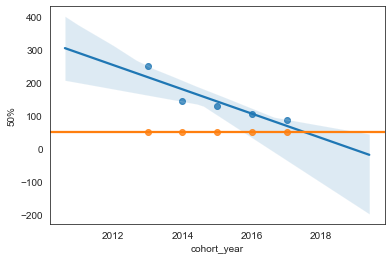

In [33]:
sns.regplot(x=cohort_stats["cohort_year"], y=cohort_stats["mean"])

sns.regplot(x=cohort_stats["cohort_year"], y=cohort_stats["50%"])


AttributeError: 'Rectangle' object has no property 'marker'

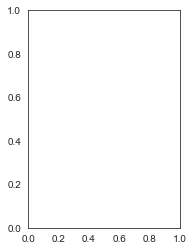

In [36]:
plt.subplot(121)
plt.bar( 'cohort_year', 'mean', data=cohort_stats, marker='o', alpha=0.4)
plt.title("A subplot with 2 lines")
 
 
# And now add something in the second part:
plt.subplot(122)
plt.plot( 'cohort_year','50%', data=cohort_stats, linestyle='none', marker='o', color="orange", alpha=0.3)


In [ ]:
x = range(10)
#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)
#This will create the bar graph for poulation
pop = plt.bar(x, datasort['population']/10**6)
plt.ylabel('Population in Millions')
plt.xticks([],[])
#The below code will create the second plot.
plt.subplot(1,2,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
gdp =plt.bar(x, datasort['gdpPerCapita'] * datasort['population'] / 10 ** 9)
plt.ylabel('GDP in Billions')
plt.xticks(x, datasort['country'], rotation='vertical')
plt.show()


### 3. Create cohort dataframes (based on first year donated)

In [97]:
#divide into cohorts
other = donations.query("cohort_yr == 'other'").reindex()
cohort13 = donations_13to17.query("cohort_yr == 'cohort13'").reindex()
cohort14 = donations_13to17.query("cohort_yr == 'cohort14'").reindex()
cohort15 = donations_13to17.query("cohort_yr == 'cohort15'").reindex()
cohort16 = donations_13to17.query("cohort_yr == 'cohort16'").reindex()
cohort17 = donations_13to17.query("cohort_yr == 'cohort17'").reindex()

In [98]:
print(other.shape)
print(cohort13.shape)
print(cohort14.shape)
print(cohort15.shape)
print(cohort16.shape)
print(cohort17.shape)

(148044, 165)
(320102, 169)
(320675, 169)
(355141, 169)
(445598, 169)
(434994, 169)


In [99]:
cohort13.to_pickle('cohort13.pkl')
cohort14.to_pickle('cohort14.pkl')
cohort15.to_pickle('cohort15.pkl')
cohort16.to_pickle('cohort16.pkl')
cohort17.to_pickle('cohort17.pkl')

### 4. Create cohort_stats dataframe

In [38]:
# stats by cohort YEAR 1

# number of donors per cohort class in their first year
no_cohort_donors_13_y1 = cohort13['id'].count() 
no_cohort_donors_14_y1 = cohort14['id'].count() 
no_cohort_donors_15_y1 = cohort15['id'].count() 
no_cohort_donors_16_y1 = cohort16['id'].count() 
no_cohort_donors_17_y1 = cohort17['id'].count() 

# number of donations cohort class made in their first year
no_cohort13_donations_y1 = cohort13['count_2013'].sum() 
no_cohort14_donations_y1 = cohort14['count_2014'].sum()  
no_cohort15_donations_y1 = cohort15['count_2015'].sum() 
no_cohort16_donations_y1 = cohort16['count_2016'].sum() 
no_cohort17_donations_y1 = cohort17['count_2017'].sum() 

# $ amount of donations cohort class made in their first year
amt_cohort13_donations_y1 = cohort13['amount_2013'].sum() 
amt_cohort14_donations_y1 = cohort14['amount_2014'].sum()  
amt_cohort15_donations_y1 = cohort15['amount_2015'].sum() 
amt_cohort16_donations_y1 = cohort16['amount_2016'].sum() 
amt_cohort17_donations_y1 = cohort17['amount_2017'].sum() 

In [39]:
# stats by cohort YEAR 2

# number of donors per cohort class in their second year
no_cohort_donors_13_y2 = cohort13.query('amount_2014 > 0').count()['id'] 
no_cohort_donors_14_y2 = cohort14.query('amount_2015 > 0').count()['id'] 
no_cohort_donors_15_y2 = cohort15.query('amount_2016 > 0').count()['id']
no_cohort_donors_16_y2 = cohort16.query('amount_2017 > 0').count()['id']

# number of donations cohort class made in their second year
no_cohort13_donations_y2 = cohort13['count_2014'].sum() 
no_cohort14_donations_y2 = cohort14['count_2015'].sum()  
no_cohort15_donations_y2 = cohort15['count_2016'].sum() 
no_cohort16_donations_y2 = cohort16['count_2017'].sum() 

# $ amount of donations cohort class made in their second year
amt_cohort13_donations_y2 = cohort13['amount_2014'].sum() 
amt_cohort14_donations_y2 = cohort14['amount_2015'].sum()  
amt_cohort15_donations_y2 = cohort15['amount_2016'].sum() 
amt_cohort16_donations_y2 = cohort16['amount_2017'].sum() 

In [40]:
# stats by cohort YEAR 3

# number of donors per cohort class in their third year
no_cohort_donors_13_y3 = cohort13.query('amount_2015 > 0').count()['id'] 
no_cohort_donors_14_y3 = cohort14.query('amount_2016 > 0').count() ['id']
no_cohort_donors_15_y3 = cohort15.query('amount_2017 > 0').count()['id']

# number of donations cohort class made in their third year
no_cohort13_donations_y3 = cohort13['count_2015'].sum() 
no_cohort14_donations_y3 = cohort14['count_2016'].sum()  
no_cohort15_donations_y3 = cohort15['count_2017'].sum() 

# $ amount of donations cohort class made in their third year
amt_cohort13_donations_y3 = cohort13['amount_2015'].sum() 
amt_cohort14_donations_y3 = cohort14['amount_2016'].sum()  
amt_cohort15_donations_y3 = cohort15['amount_2017'].sum() 

In [41]:
# stats by cohort YEAR 4

# number of donors per cohort class in their fourth year
no_cohort_donors_13_y4 = cohort13.query('amount_2016 > 0').count()['id'] 
no_cohort_donors_14_y4 = cohort14.query('amount_2017 > 0').count()['id'] 

# number of donations cohort class made in their fourth year
no_cohort13_donations_y4 = cohort13['count_2016'].sum() 
no_cohort14_donations_y4 = cohort14['count_2017'].sum()  

# $ amount of donations cohort class made in their fourth year
amt_cohort13_donations_y4 = cohort13['amount_2016'].sum() 
amt_cohort14_donations_y4 = cohort14['amount_2017'].sum()  

In [42]:
# stats by cohort YEAR 5

# number of donors per cohort class in their fifth year
no_cohort_donors_13_y5 = cohort13.query('amount_2017 > 0').count()['id'] 

# number of donations cohort class made in their fifth year
no_cohort13_donations_y5 = cohort13['count_2017'].sum() 

# $ amount of donations cohort class made in their fifth year
amt_cohort13_donations_y5 = cohort13['amount_2017'].sum() 

In [ ]:
# print(f'cohort13 --->')
# print(no_cohort_donors_13_y1)
# print(no_cohort_donors_13_y2)
# print(no_cohort_donors_13_y3)
# print(no_cohort_donors_13_y4)
# print(no_cohort_donors_13_y5)

# print(no_cohort13_donations_y1)
# print(no_cohort13_donations_y2)
# print(no_cohort13_donations_y3)
# print(no_cohort13_donations_y4)
# print(no_cohort13_donations_y5)

# print(amt_cohort13_donations_y1)
# print(amt_cohort13_donations_y2)
# print(amt_cohort13_donations_y3)
# print(amt_cohort13_donations_y4)
# print(amt_cohort13_donations_y5)

# print(f'cohort14 --->')
# print(no_cohort_donors_14_y1)
# print(no_cohort_donors_14_y2)
# print(no_cohort_donors_14_y3)
# print(no_cohort_donors_14_y4)

# print(no_cohort14_donations_y1)
# print(no_cohort14_donations_y2)
# print(no_cohort14_donations_y3)
# print(no_cohort14_donations_y4)

# print(amt_cohort14_donations_y1)
# print(amt_cohort14_donations_y2)
# print(amt_cohort14_donations_y3)
# print(amt_cohort14_donations_y4)

# print(f'cohort15 --->')
# print(no_cohort_donors_15_y1)
# print(no_cohort_donors_15_y2)
# print(no_cohort_donors_15_y3)

# print(no_cohort15_donations_y1)
# print(no_cohort15_donations_y2)
# print(no_cohort15_donations_y3)

# print(amt_cohort15_donations_y1)
# print(amt_cohort15_donations_y2)
# print(amt_cohort15_donations_y3)

# print(f'cohort16 --->')
# print(no_cohort_donors_16_y1)
# print(no_cohort_donors_16_y2)

# print(no_cohort16_donations_y1)
# print(no_cohort16_donations_y2)

# print(amt_cohort16_donations_y1)
# print(amt_cohort16_donations_y2)

# print(f'cohort17 --->')
# print(no_cohort_donors_17_y1)

# print(no_cohort17_donations_y1)

# print(amt_cohort17_donations_y1)

In [ ]:
# print(f'yr 1 --->')
# print(no_cohort13_donations_y1)
# print(no_cohort14_donations_y1)
# print(no_cohort15_donations_y1)
# print(no_cohort16_donations_y1)
# print(no_cohort17_donations_y1)

# print(f'yr 2 --->')
# print(no_cohort13_donations_y2)
# print(no_cohort14_donations_y2)
# print(no_cohort15_donations_y2)
# print(no_cohort16_donations_y2)

# print(f'yr 3 --->')
# print(no_cohort13_donations_y3)
# print(no_cohort14_donations_y3)
# print(no_cohort15_donations_y3)

# print(f'yr 4 --->')
# print(no_cohort13_donations_y4)
# print(no_cohort14_donations_y4)

# print(f'yr 5 --->')
# print(no_cohort13_donations_y5)

In [43]:
cohort_stats={'year':[2013, 2014, 2015, 2016, 2017],
              'no_cohort_donors_y1':[no_cohort_donors_13_y1, no_cohort_donors_14_y1, no_cohort_donors_15_y1, no_cohort_donors_16_y1, no_cohort_donors_17_y1],
              'no_donations_y1':[no_cohort13_donations_y1, no_cohort14_donations_y1, no_cohort15_donations_y1, no_cohort16_donations_y1, no_cohort17_donations_y1],
              'amt_donated_y1':[amt_cohort13_donations_y1, amt_cohort14_donations_y1, amt_cohort15_donations_y1, amt_cohort16_donations_y1, amt_cohort17_donations_y1],
              'no_cohort_donors_y2':[no_cohort_donors_13_y2, no_cohort_donors_14_y2, no_cohort_donors_15_y2, no_cohort_donors_16_y2, np.nan],
              'no_donations_y2':[no_cohort13_donations_y2, no_cohort14_donations_y2, no_cohort15_donations_y2, no_cohort16_donations_y2, np.nan],
              'amt_donated_y2':[amt_cohort13_donations_y2, amt_cohort14_donations_y2, amt_cohort15_donations_y2, amt_cohort16_donations_y2, np.nan],
              'no_cohort_donors_y3':[no_cohort_donors_13_y3, no_cohort_donors_14_y3, no_cohort_donors_15_y3, np.nan, np.nan],
              'no_donations_y3':[no_cohort13_donations_y3, no_cohort14_donations_y3, no_cohort15_donations_y3, np.nan, np.nan],
              'amt_donated_y3':[amt_cohort13_donations_y3, amt_cohort14_donations_y3, amt_cohort15_donations_y3, np.nan, np.nan],
              'no_cohort_donors_y4':[no_cohort_donors_13_y4, no_cohort_donors_14_y4, np.nan, np.nan, np.nan],
              'no_donations_yr4':[no_cohort13_donations_y4, no_cohort14_donations_y4, np.nan, np.nan, np.nan],
              'amt_donated_y4':[amt_cohort13_donations_y4, amt_cohort14_donations_y4, np.nan, np.nan, np.nan],
              'no_cohort_donors_y5':[no_cohort_donors_13_y5, np.nan, np.nan, np.nan, np.nan],
              'no_donations_y5':[no_cohort13_donations_y5, np.nan, np.nan, np.nan, np.nan],
              'amt_donated_y5':[amt_cohort13_donations_y5, np.nan, np.nan, np.nan, np.nan]
             }
cohort_stats=pd.DataFrame(cohort_stats)

In [44]:
cohort_stats

,year,no_cohort_donors_y1,no_donations_y1,amt_donated_y1,no_cohort_donors_y2,no_donations_y2,amt_donated_y2,no_cohort_donors_y3,no_donations_y3,amt_donated_y3,no_cohort_donors_y4,no_donations_yr4,amt_donated_y4,no_cohort_donors_y5,no_donations_y5,amt_donated_y5
0,2013,320102,573983,30428184.74,62142.0,285259.0,15286871.11,42240.0,184148.0,12595399.86,32642.0,152544.0,11403685.98,26933.0,160109.0,11159399.13
1,2014,320675,461349,26174346.80,48667.0,131028.0,7745897.26,31525.0,89558.0,6437708.77,24290.0,86127.0,5818855.02,NaN,NaN,NaN
2,2015,355141,468186,30147004.32,46078.0,112446.0,8280549.87,31844.0,98312.0,7444163.63,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,445598,602717,36530214.52,56538.0,177433.0,10475760.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,434994,668561,37973855.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cohort_stats.head()

,year,no_cohort_donors_y1,no_donations_y1,amt_donated_y1,no_cohort_donors_y2,no_donations_y2,amt_donated_y2,no_cohort_donors_y3,no_donations_y3,amt_donated_y3,no_cohort_donors_y4,no_donations_yr4,amt_donated_y4,no_cohort_donors_y5,no_donations_y5,amt_donated_y5
0,2013,320102,573983,30428184.74,62142.0,285259.0,15286871.11,42240.0,184148.0,12595399.86,32642.0,152544.0,11403685.98,26933.0,160109.0,11159399.13
1,2014,320675,461349,26174346.80,48667.0,131028.0,7745897.26,31525.0,89558.0,6437708.77,24290.0,86127.0,5818855.02,NaN,NaN,NaN
2,2015,355141,468186,30147004.32,46078.0,112446.0,8280549.87,31844.0,98312.0,7444163.63,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,445598,602717,36530214.52,56538.0,177433.0,10475760.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,434994,668561,37973855.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cohort_stats.to_pickle('cohort_stats.pkl')

### 5. Create giving year dataframes (yr1, yr2, etc.)

In [47]:
# create year 1 dataframe
year1 = donations_13to17[['id', 'cohort_yr', 'amount_yr1', 'count_yr1', 'amount_01_yr1', 'amount_02_yr1', 'amount_03_yr1', 'amount_04_yr1', 'amount_05_yr1', 'amount_06_yr1', 'amount_07_yr1', 'amount_08_yr1', 'amount_09_yr1', 'amount_10_yr1', 'amount_11_yr1', 'amount_12_yr1']].copy()

In [48]:
#rename columns
year1.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [49]:
# create year 2 dataframe
year2 = donations_13to17[['id', 'cohort_yr', 'amount_yr2', 'count_yr2', 'amount_01_yr2', 'amount_02_yr2', 'amount_03_yr2', 'amount_04_yr2', 'amount_05_yr2', 'amount_06_yr2', 'amount_07_yr2', 'amount_08_yr2', 'amount_09_yr2', 'amount_10_yr2', 'amount_11_yr2', 'amount_12_yr2']].copy()

In [50]:
#rename columns
year2.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [51]:
# create year 3 dataframe
year3 = donations_13to17[['id', 'cohort_yr', 'amount_yr3', 'count_yr3', 'amount_01_yr3', 'amount_02_yr3', 'amount_03_yr3', 'amount_04_yr3', 'amount_05_yr3', 'amount_06_yr3', 'amount_07_yr3', 'amount_08_yr3', 'amount_09_yr3', 'amount_10_yr3', 'amount_11_yr3', 'amount_12_yr3']].copy()

In [52]:
#rename columns
year3.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [53]:
# create year 4 dataframe
year4 = donations_13to17[['id', 'cohort_yr', 'amount_yr4', 'count_yr4', 'amount_01_yr4', 'amount_02_yr4', 'amount_03_yr4', 'amount_04_yr4', 'amount_05_yr4', 'amount_06_yr4', 'amount_07_yr4', 'amount_08_yr4', 'amount_09_yr4', 'amount_10_yr4', 'amount_11_yr4', 'amount_12_yr4']].copy()

In [54]:
#rename columns
year4.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [55]:
# create year 5 dataframe
year5 = donations_13to17[['id', 'cohort_yr', 'amount_yr5', 'count_yr5', 'amount_01_yr5', 'amount_02_yr5', 'amount_03_yr5', 'amount_04_yr5', 'amount_05_yr5', 'amount_06_yr5', 'amount_07_yr5', 'amount_08_yr5', 'amount_09_yr5', 'amount_10_yr5', 'amount_11_yr5', 'amount_12_yr5']].copy()

In [56]:
#rename columns
year5.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [57]:
year1.to_pickle('year1.pkl')
year2.to_pickle('year2.pkl')
year3.to_pickle('year3.pkl')
year4.to_pickle('year4.pkl')
year5.to_pickle('year5.pkl')

In [58]:
year1.head()

,id,cohort_yr,amount,count,jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
0,1f4b5b6e68445c6c4a0509b3aca93f38,cohort15,18211.38,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2400.0,200.0,15611.38
1,4aaab6d244bf3599682239ed5591af8a,cohort16,25.00,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0b0765dc9c759adc48a07688ba25e94e,cohort15,20.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.00
3,377944ad61f72d800b25ec1862aec363,cohort16,25.00,1.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,6d5b22d39e68c656071a842732c63a0c,cohort15,70.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.00


### 6. Create yearly_stats dataframe PICK UP HERE

In [ ]:
yearly_stats={'year':[2013, 2014, 2015, 2016, 2017],
              'no_donors':[no_donors_13, no_donors_14, no_donors_15, no_donors_16, no_donors_17],
              'no_new_donors':[no_new_donors_13, no_new_donors_14, no_new_donors_15, no_new_donors_16, no_new_donors_17],
              'no_repeat_donors':[no_repeat_donors_13, no_repeat_donors_14, no_repeat_donors_15, no_repeat_donors_16, no_repeat_donors_17],
              'no_donors_lapsed':[np.nan, no_donors_lapsed_14, no_donors_lapsed_15, no_donors_lapsed_16, no_donors_lapsed_17],
              'retention_rate':[np.nan, retention_rate_14, retention_rate_15, retention_rate_16, retention_rate_17],
              'amt_donated':[amt_donated_13, amt_donated_14, amt_donated_15, amt_donated_16, amt_donated_17],
              'no_donations':[no_donations_13, no_donations_14, no_donations_15, no_donations_16, no_donations_17],
              'avg_amt_per_donor':[avg_amt_per_donor_13, avg_amt_per_donor_14, avg_amt_per_donor_15, avg_amt_per_donor_16, avg_amt_per_donor_17],
              'max_amt_by_single_donor':[max_amt_by_single_donor_13, max_amt_by_single_donor_14, max_amt_by_single_donor_15, max_amt_by_single_donor_16, max_amt_by_single_donor_17]
             }
cohort_stats=pd.DataFrame(cohort_stats)

In [ ]:
#info on largest donor overall
donations[donations['amount_total'] == donations['amount_total'].max()]
# or donations.loc[donations['amount_total'].idxmax()]

In [ ]:
plt.hist('count_2017', data=cohort17, log=True);

In [ ]:
#cohort stats
data=cohort13
y1_donor_count=data.query('amount_first_year > 0').count()['amount_first_year']
y2_donor_count=data.query('amount_second_year > 0').count()['amount_second_year']
y3_donor_count=data.query('amount_third_year > 0').count()['amount_third_year']
y4_donor_count=data.query('amount_fourth_year > 0').count()['amount_fourth_year']
y5_donor_count=data.query('amount_fifth_year > 0').count()['amount_fifth_year']

y1_donations_dollars=data.amount_first_year.sum()/100
y2_donations_dollars=data.amount_second_year.sum()/100
y3_donations_dollars=data.amount_third_year.sum()/100
y4_donations_dollars=data.amount_fourth_year.sum()/100
y5_donations_dollars=data.amount_fifth_year.sum()/100

y1_donations_count=data.count_first_year.sum()
y2_donations_count=data.count_second_year.sum()
y3_donations_count=data.count_third_year.sum()
y4_donations_count=data.count_fourth_year.sum()
y5_donations_count=data.count_fifth_year.sum()

print(f'*first year data*')
print(f'cohort size:', y1_donor_count)
print(f'total $ donated:', y1_donations_dollars)
print(f'total # donations:', y1_donations_count)
print(f'average # donations per donor:', y1_donations_count/y1_donor_count)
print(f'average $ donated per donor', y1_donations_dollars/y1_donor_count)
print(f'max donation:',data.amount_first_year.max()/100)

print(f'*second year data*')
print(f'cohort size:', y2_donor_count)
print(f'total $ donated:', y2_donations_dollars)
print(f'total # donations:', y2_donations_count)
print(f'average # donations per donor:', y2_donations_count/y2_donor_count)
print(f'average $ donated per donor', y2_donations_dollars/y2_donor_count)
print(f'max donation:',data.amount_second_year.max()/100)

In [ ]:
#cohort stats
data=cohort13
print(f'first year data')
print(f'cohort size:', data.id.count())
print(f'total $ donated in first year:', data.amount_first_year.sum())
print(f'total # donations in first year', data.amount_second_year.sum())
print(f'average # donations per donor in first year:', data.count_first_year.sum()/data.id.count())
print(f'average $ donated per donor in first year', data.amount_first_year.sum()/data.id.count())